### 5.1 Tuning hyperparameters by hand

![hyperparameters_byhand](resources/hyperparameters_byhand.png)

![sets](resources/sets.png)

In [33]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()

clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [34]:
# Three sets
clf

RandomForestClassifier()

We are going to try and adjust:

* `max_depth`
* `max_features`
* `min_samples_leaf`
* `min_samples_split`
* `n_estimators`

In [35]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


def evaluate_preds(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    metric_dict = {"accuracy": round(accuracy, 2), "precision": round(precision, 2), "recall": round(recall, 2),
                   "f1": round(f1, 2)}

    print(f"Accuracy: {accuracy * 100:.2f}%")
    print(f"Precision: {precision:.2f}%")
    print(f"Recall: {recall:.2f}%")
    print(f"F1: {f1:.2f}%")

    return metric_dict

In [36]:
import pandas as pd
import numpy as np

heart_disease = pd.read_csv("resources/heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [37]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

# Shuffle the data
heart_disease_shuffled = heart_disease.sample(frac=1)

# Split into X and y
X = heart_disease_shuffled.drop("target", axis=1)
y = heart_disease_shuffled["target"]

# Split into train, validation and test sets
train_split = round(0.7 * len(heart_disease_shuffled))
valid_split = round(train_split + 0.15 * len(heart_disease_shuffled))
X_train, y_train = X[:train_split], y[:train_split]
X_valid, y_valid = X[train_split:valid_split], y[train_split:valid_split]
X_test, y_test = X[valid_split:], y[valid_split:]

clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Predictions (baseline)
y_pred = clf.predict(X_valid)

baseline_metrics = evaluate_preds(y_valid, y_pred)

Accuracy: 82.22%
Precision: 0.81%
Recall: 0.88%
F1: 0.85%


In [38]:
# Changing hyperparameters

np.random.seed(42)
clf_2 = RandomForestClassifier(n_estimators=5000)
clf_2.fit(X_train, y_train)

# Predictions (baseline)
y_pred_2 = clf.predict(X_valid)

baseline_metrics_2 = evaluate_preds(y_valid, y_pred_2)

Accuracy: 82.22%
Precision: 0.81%
Recall: 0.88%
F1: 0.85%


# 5.2 - Tuning hyperparameters with RandomizedSearchCV

![](./resources/cross-validation.png)

In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

grid = {"n_estimators": [10, 100, 200, 500, 1000, 2000],
        "max_depth": [None, 5, 10, 20, 30],
        "max_features": ["sqrt"],
        "min_samples_split": [2, 4, 6],
        "min_samples_leaf": [1, 2, 4]}

np.random.seed(42)

# n_jobs is the number of cores to dedicate to it
clf = RandomForestClassifier(n_jobs=1)

# Setup RandomizedSearchCV
rs_clf = RandomizedSearchCV(estimator=clf,
                            param_distributions=grid,
                            n_iter=10,  # (n_iter is the number of combinations to try)
                            cv=5,  # Using the cross-validation seen above
                            verbose=2)

# Fit
rs_clf.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=200; total time=   0.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=200; total time=   0.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=1),
                   param_distributions={'max_depth': [None, 5, 10, 20, 30],
                                        'max_features': ['sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 4, 6],
                                        'n_estimators': [10, 100, 200, 500,
                                                         1000, 2000]},
                   verbose=2)

In [40]:
rs_clf.best_params_  # Uses as default when calling predict

{'n_estimators': 100,
 'min_samples_split': 6,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 30}

In [41]:
rs_y_preds = rs_clf.predict(X_test)

# Evaluate predictions
rs_metrics = evaluate_preds(y_test, rs_y_preds)

Accuracy: 84.78%
Precision: 0.85%
Recall: 0.88%
F1: 0.86%


# 5.3 Hyperparameter tuning with GridSearchCV

It goes through every single combination of the grid

In [42]:
# Create based on the best hyperparameters found by RandomSearchCV

grid_2 = {"n_estimators": [100, 200, 500],
          "max_depth": [10, 20, 30],
          "max_features": ["sqrt"],
          "min_samples_split": [4, 6],
          "min_samples_leaf": [1, 2]}

In [43]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
import numpy as np

np.random.seed(42)

# n_jobs is the number of cores to dedicate to it
clf = RandomForestClassifier(n_jobs=1)

# Setup RandomizedSearchCV
gs_clf = GridSearchCV(estimator=clf,
                      param_grid=grid_2,
                      cv=5,
                      verbose=2)

# Fit
gs_clf.fit(X_train, y_train);

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=200; total time=   0.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=200; total time=   0.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=20

In [44]:
gs_clf.best_params_

{'max_depth': 20,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 6,
 'n_estimators': 500}

In [45]:
gs_y_preds = gs_clf.predict(X_test)

gs_metrics = evaluate_preds(y_test, gs_y_preds)

Accuracy: 78.26%
Precision: 0.83%
Recall: 0.76%
F1: 0.79%


## Compare different models metrics

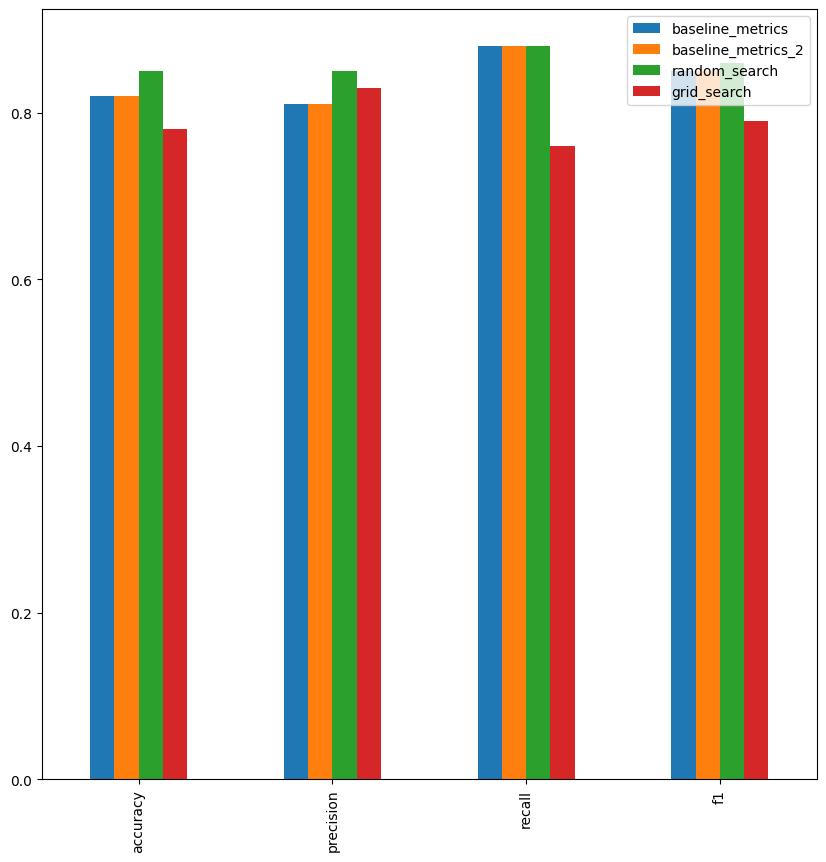

In [46]:
compare_metrics = pd.DataFrame({"baseline_metrics": baseline_metrics,
                                "baseline_metrics_2": baseline_metrics_2,
                                "random_search": rs_metrics,
                                "grid_search": gs_metrics})

compare_metrics.plot.bar(figsize=(10, 10));